In [109]:
words = open("names.txt", 'r').read().splitlines()

In [110]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [111]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = ((ch1, ch2), ch3)
        b[trigram] = b.get(trigram, 0) + 1
    

In [112]:
sorted(b.items(), key = lambda kv: -kv[1])


[((('a', 'h'), '<E>'), 1714),
 ((('n', 'a'), '<E>'), 1673),
 ((('a', 'n'), '<E>'), 1509),
 ((('o', 'n'), '<E>'), 1503),
 ((('<S>', 'm'), 'a'), 1453),
 ((('<S>', 'j'), 'a'), 1255),
 ((('<S>', 'k'), 'a'), 1254),
 ((('e', 'n'), '<E>'), 1217),
 ((('l', 'y'), 'n'), 976),
 ((('y', 'n'), '<E>'), 953),
 ((('a', 'r'), 'i'), 950),
 ((('i', 'a'), '<E>'), 903),
 ((('i', 'e'), '<E>'), 858),
 ((('a', 'n'), 'n'), 825),
 ((('e', 'l'), 'l'), 822),
 ((('a', 'n'), 'a'), 804),
 ((('i', 'a'), 'n'), 790),
 ((('m', 'a'), 'r'), 776),
 ((('i', 'n'), '<E>'), 766),
 ((('e', 'l'), '<E>'), 727),
 ((('y', 'a'), '<E>'), 716),
 ((('a', 'n'), 'i'), 703),
 ((('<S>', 'd'), 'a'), 700),
 ((('l', 'a'), '<E>'), 684),
 ((('e', 'r'), '<E>'), 683),
 ((('i', 'y'), 'a'), 669),
 ((('l', 'a'), 'n'), 647),
 ((('<S>', 'b'), 'r'), 646),
 ((('n', 'n'), 'a'), 633),
 ((('<S>', 'a'), 'l'), 632),
 ((('<S>', 'c'), 'a'), 628),
 ((('r', 'a'), '<E>'), 627),
 ((('n', 'i'), '<E>'), 625),
 ((('<S>', 'a'), 'n'), 623),
 ((('n', 'n'), '<E>'), 619),

In [113]:
import torch

N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0

stoi


{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [114]:
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [115]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        N[(ix1, ix2), ix3] += 1

N


tensor([[    0, 10075,   234,   142,   494,  4089,    44,    38,  1527,  2809,
            50,   161,  1568,   789,   807,  2599,    47,    11,  2209,   481,
           269,  1331,   472,    92,    36,  1346,   313],
        [11566,  4098,   726,   735,  2214,  3137,   178,   386,  3027,  5541,
           256,   817,  4363,  2065,  6810,   862,   145,   100,  4222,  1900,
          1366,   664,  1133,   207,   211,  3203,   642],
        [  287,   657,    64,    30,    99,   935,     0,    24,    72,   542,
             4,    25,   362,    10,   179,   200,     1,     0,  1091,    84,
            78,   103,     3,    16,    14,   250,     8],
        [  656,  1254,    33,    59,    46,   893,     4,     6,   679,   500,
             5,   317,   501,   107,   182,   504,    25,    11,   496,   155,
           111,   106,    14,     4,     3,   246,     8],
        [ 1134,  1649,    15,    60,   178,  1695,     9,    42,   166,   989,
            36,    52,   625,   266,   886,   480,   

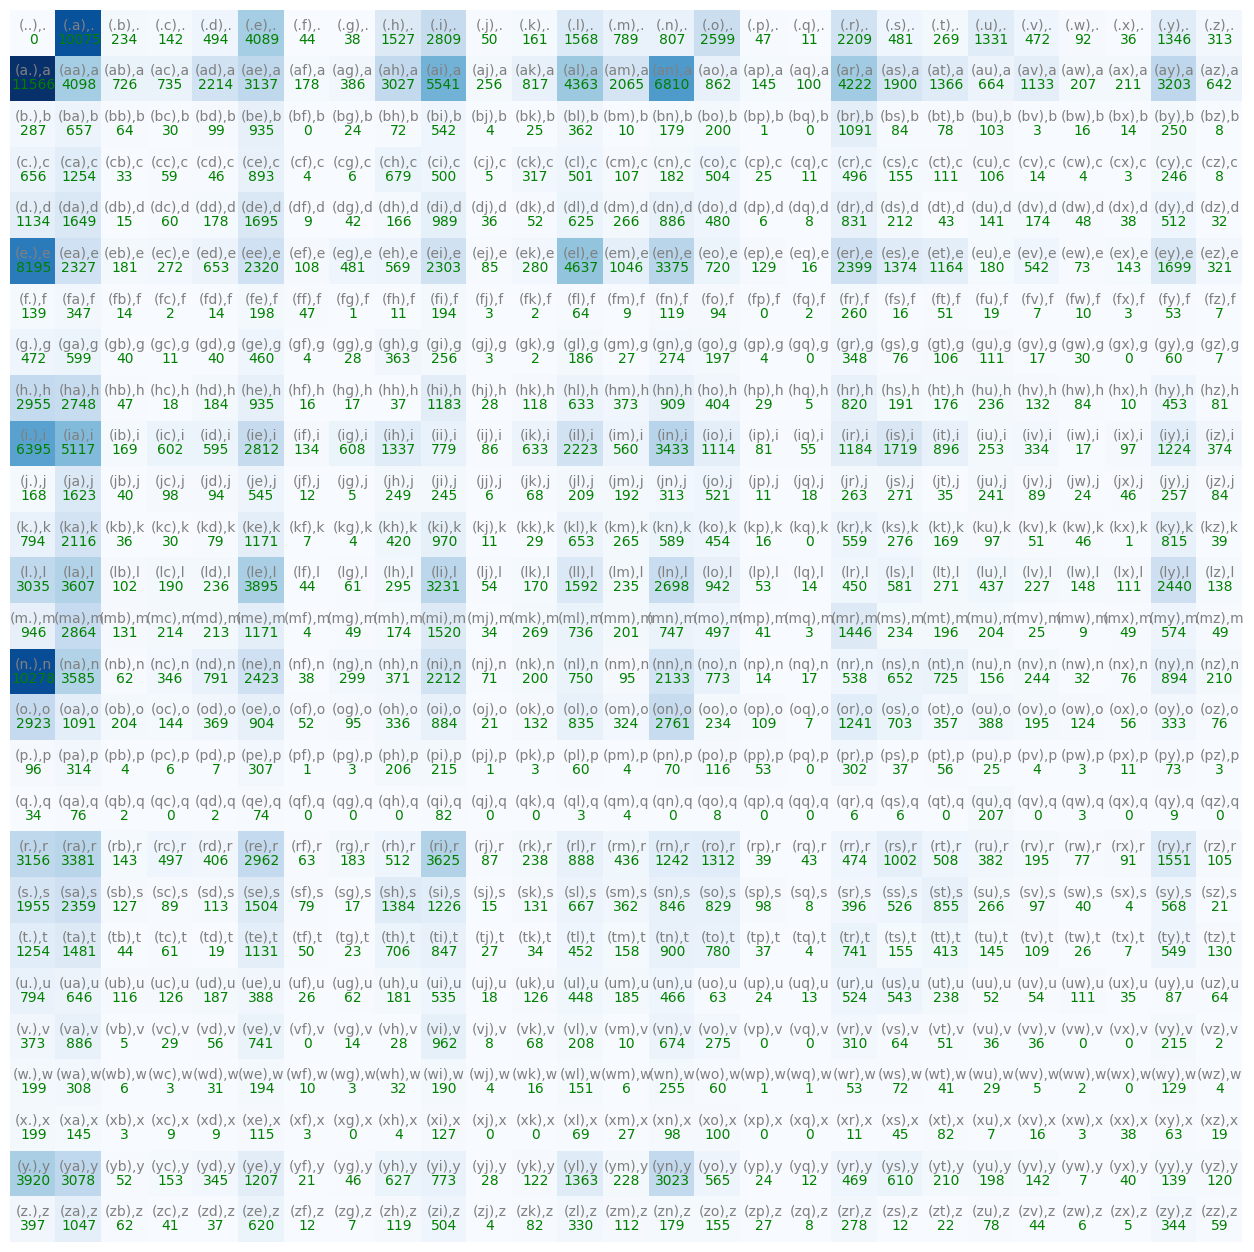

In [116]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = f'({itos[i]}{itos[j]}),{itos[i]}'
        plt.text(j, i, N[(i, j)].item(), ha="center", va="top", color='green')
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
plt.axis('off');

In [117]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.3145, 0.0073, 0.0044, 0.0154, 0.1276, 0.0014, 0.0012, 0.0477,
        0.0877, 0.0016, 0.0050, 0.0489, 0.0246, 0.0252, 0.0811, 0.0015, 0.0003,
        0.0690, 0.0150, 0.0084, 0.0416, 0.0147, 0.0029, 0.0011, 0.0420, 0.0098])

In [118]:
g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[idx]

'a'

In [119]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    idx = 0
    while True:
        p = N[idx].float()
        p = p / p.sum()
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0: break

    print(''.join(out))

a.
onde.
ianasah.
u.
elay.
ainn.
esi.
rltoleras.
ree.
usahnaauianileviai.
dedainrwi.
el.
sniyieaylarte.
unveumrhyfoetume.
n.
ynslenhrsani.
hore.
yae.
on.
ay.
